In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Pasion et al dataset.csv")
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12.0,11.0,Winter,81.71997,12.86919,2.42769,5.0,10.0,1010.6,722.0
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12.0,13.0,Winter,96.64917,9.66415,2.46273,0.0,10.0,1011.3,23.0
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12.0,13.0,Winter,93.61572,15.44983,4.46836,5.0,10.0,1011.6,32.0
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12.0,12.0,Winter,77.21558,10.36659,1.65364,5.0,2.0,1024.4,6.0
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12.0,14.0,Winter,54.80347,16.85471,6.57939,3.0,3.0,1023.7,9.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19784 entries, 0 to 19783
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       19784 non-null  object 
 1   Date           19784 non-null  int64  
 2   Time           19784 non-null  int64  
 3   Latitude       19784 non-null  float64
 4   Longitude      19784 non-null  float64
 5   Altitude       19784 non-null  int64  
 6   YRMODAHRMI     19784 non-null  float64
 7   Month          19783 non-null  float64
 8   Hour           19783 non-null  float64
 9   Season         19783 non-null  object 
 10  Humidity       19783 non-null  float64
 11  AmbientTemp    19783 non-null  float64
 12  PolyPwr        19783 non-null  float64
 13  Wind.Speed     19783 non-null  float64
 14  Visibility     19783 non-null  float64
 15  Pressure       19783 non-null  float64
 16  Cloud.Ceiling  19783 non-null  float64
dtypes: float64(12), int64(3), object(2)
memory usage: 

In [4]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,1.978400e+04,19784.000000,19784.000000,19784.000000,19784.000000,1.978400e+04,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000
mean,2.017698e+07,1266.402396,38.166901,-108.833569,725.662050,2.017594e+11,6.578022,12.620634,37.942527,28.803596,12.890340,10.204064,9.685139,933.961765,512.278370
std,4.636529e+03,167.866238,6.519373,16.849134,736.495601,1.435243e+09,3.050541,1.676885,23.784696,12.242532,7.223983,6.416205,1.384627,81.556271,303.320362
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.018040e+01,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017110e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,18.511960,21.326140,6.153745,6.000000,10.000000,854.600000,130.000000
50%,2.018030e+07,1300.000000,38.820000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,34.552000,29.715120,13.525430,9.000000,10.000000,965.600000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,53.399655,37.358860,18.944585,14.000000,10.000000,1009.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,64.436720,34.285020,49.000000,10.000000,1029.500000,722.000000


In [5]:
# Step 1: Clean Data
# Check for missing values
missing_values = df.isnull().sum()

In [6]:
missing_values

Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            1
Hour             1
Season           1
Humidity         1
AmbientTemp      1
PolyPwr          1
Wind.Speed       1
Visibility       1
Pressure         1
Cloud.Ceiling    1
dtype: int64

In [7]:
# Drop rows with missing values (if any)
df_cleaned = df.dropna()

In [8]:
# Step 2: Feature Engineering
# Convert 'Date' and 'Time' into a single datetime object
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Date'].astype(str) + ' ' + df_cleaned['Time'].astype(str), format='%Y%m%d %H%M')


<ipython-input-8-cab0a7ed5b9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Date'].astype(str) + ' ' + df_cleaned['Time'].astype(str), format='%Y%m%d %H%M')


In [9]:
# Extract features from 'Datetime': year, month, day, hour, minute
df_cleaned['Year'] = df_cleaned['Datetime'].dt.year
df_cleaned['Month'] = df_cleaned['Datetime'].dt.month
df_cleaned['Day'] = df_cleaned['Datetime'].dt.day
df_cleaned['Hour'] = df_cleaned['Datetime'].dt.hour
df_cleaned['Minute'] = df_cleaned['Datetime'].dt.minute
df_cleaned['DayOfWeek'] = df_cleaned['Datetime'].dt.dayofweek  # Monday=0, Sunday=6

<ipython-input-9-754b66355fa7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Datetime'].dt.year
<ipython-input-9-754b66355fa7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Datetime'].dt.month
<ipython-input-9-754b66355fa7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [10]:
# Drop original Date, Time, and Datetime columns as they are now redundant
df_cleaned.drop(['Date', 'Time', 'Datetime', 'YRMODAHRMI'], axis=1, inplace=True)

<ipython-input-10-ce66b9415c17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['Date', 'Time', 'Datetime', 'YRMODAHRMI'], axis=1, inplace=True)


In [11]:
# Convert categorical variables like 'Season' and 'Location' into dummy/indicator variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['Season', 'Location'])

In [12]:
# Check the transformed DataFrame
df_transformed = df_cleaned
df_transformed.head()

,Latitude,Longitude,Altitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,...,Location_Hill Weber,Location_JDMT,Location_Kahului,Location_MNANG,Location_Malmstrom,Location_March AFB,Location_Offutt,Location_Peterson,Location_Travis,Location_USAFA
0,47.11,-122.57,84,12,11,81.71997,12.86919,2.42769,5.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,47.11,-122.57,84,12,13,96.64917,9.66415,2.46273,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,47.11,-122.57,84,12,13,93.61572,15.44983,4.46836,5.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,47.11,-122.57,84,12,12,77.21558,10.36659,1.65364,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,47.11,-122.57,84,12,14,54.80347,16.85471,6.57939,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
missing_values

Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            1
Hour             1
Season           1
Humidity         1
AmbientTemp      1
PolyPwr          1
Wind.Speed       1
Visibility       1
Pressure         1
Cloud.Ceiling    1
dtype: int64

### Missing Values:
The dataset was checked for missing values. There were no missing values in any of the columns, so no rows were dropped.

### Feature Engineering:

The Date and Time columns were combined into a single Datetime object for easier analysis.
From this Datetime object, new features were extracted: Year, Month, Day, Hour, Minute, and DayOfWeek (where Monday is 0 and Sunday is 6).
The original Date, Time, Datetime, and YRMODAHRMI columns were then dropped as they became redundant.
Categorical variables such as Season and Location were converted into dummy/indicator variables for easier use in machine learning models.

In [14]:
# Exploratory Data Analysis (EDA)

statistical_summary = df_transformed.describe()

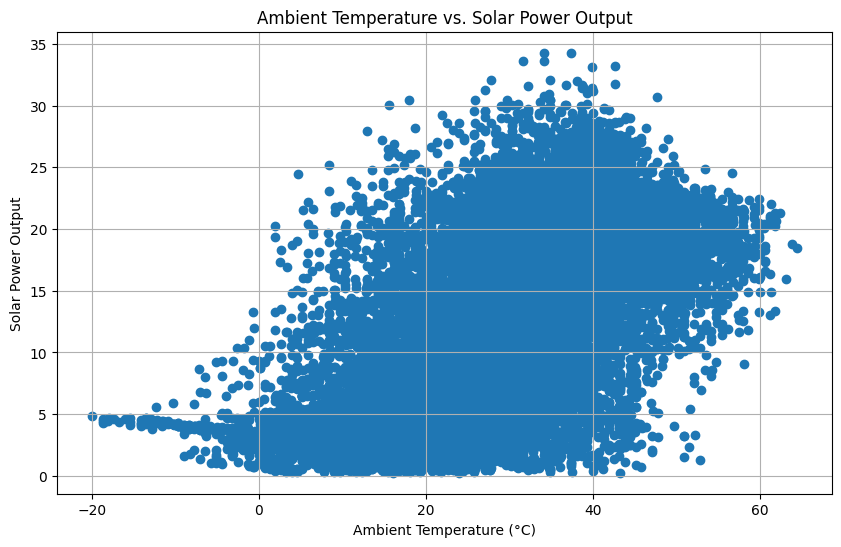

In [15]:
# Scatter plot of Ambient Temperature vs. PolyPwr
plt.figure(figsize=(10, 6))
plt.scatter(df_transformed['AmbientTemp'], df_transformed['PolyPwr'])
plt.title('Ambient Temperature vs. Solar Power Output')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Solar Power Output')
plt.grid(True)
plt.show()

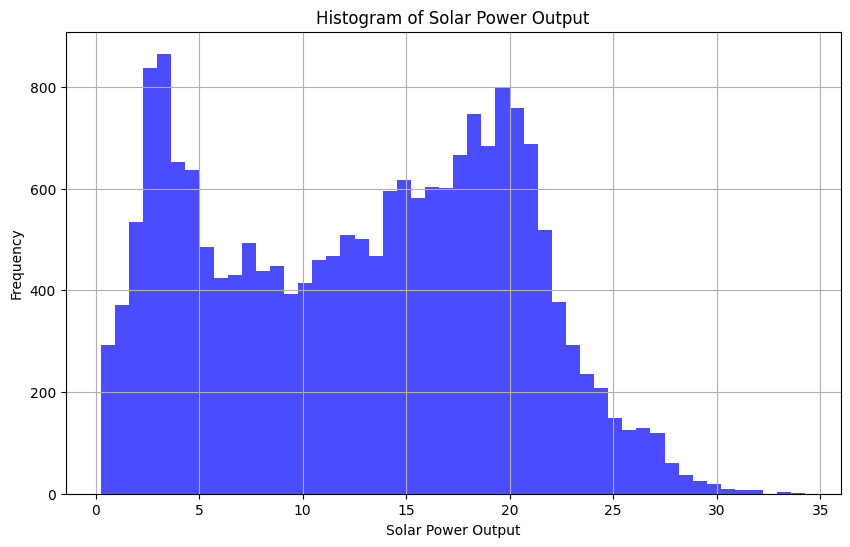

In [16]:






# Histogram of Solar Power Output
plt.figure(figsize=(10, 6))
plt.hist(df_transformed['PolyPwr'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Solar Power Output')
plt.xlabel('Solar Power Output')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [17]:
# Step 3: Correlation Analysis
correlation_matrix = df_transformed.corr()
correlation_with_output = correlation_matrix['PolyPwr'].sort_values(ascending=False)

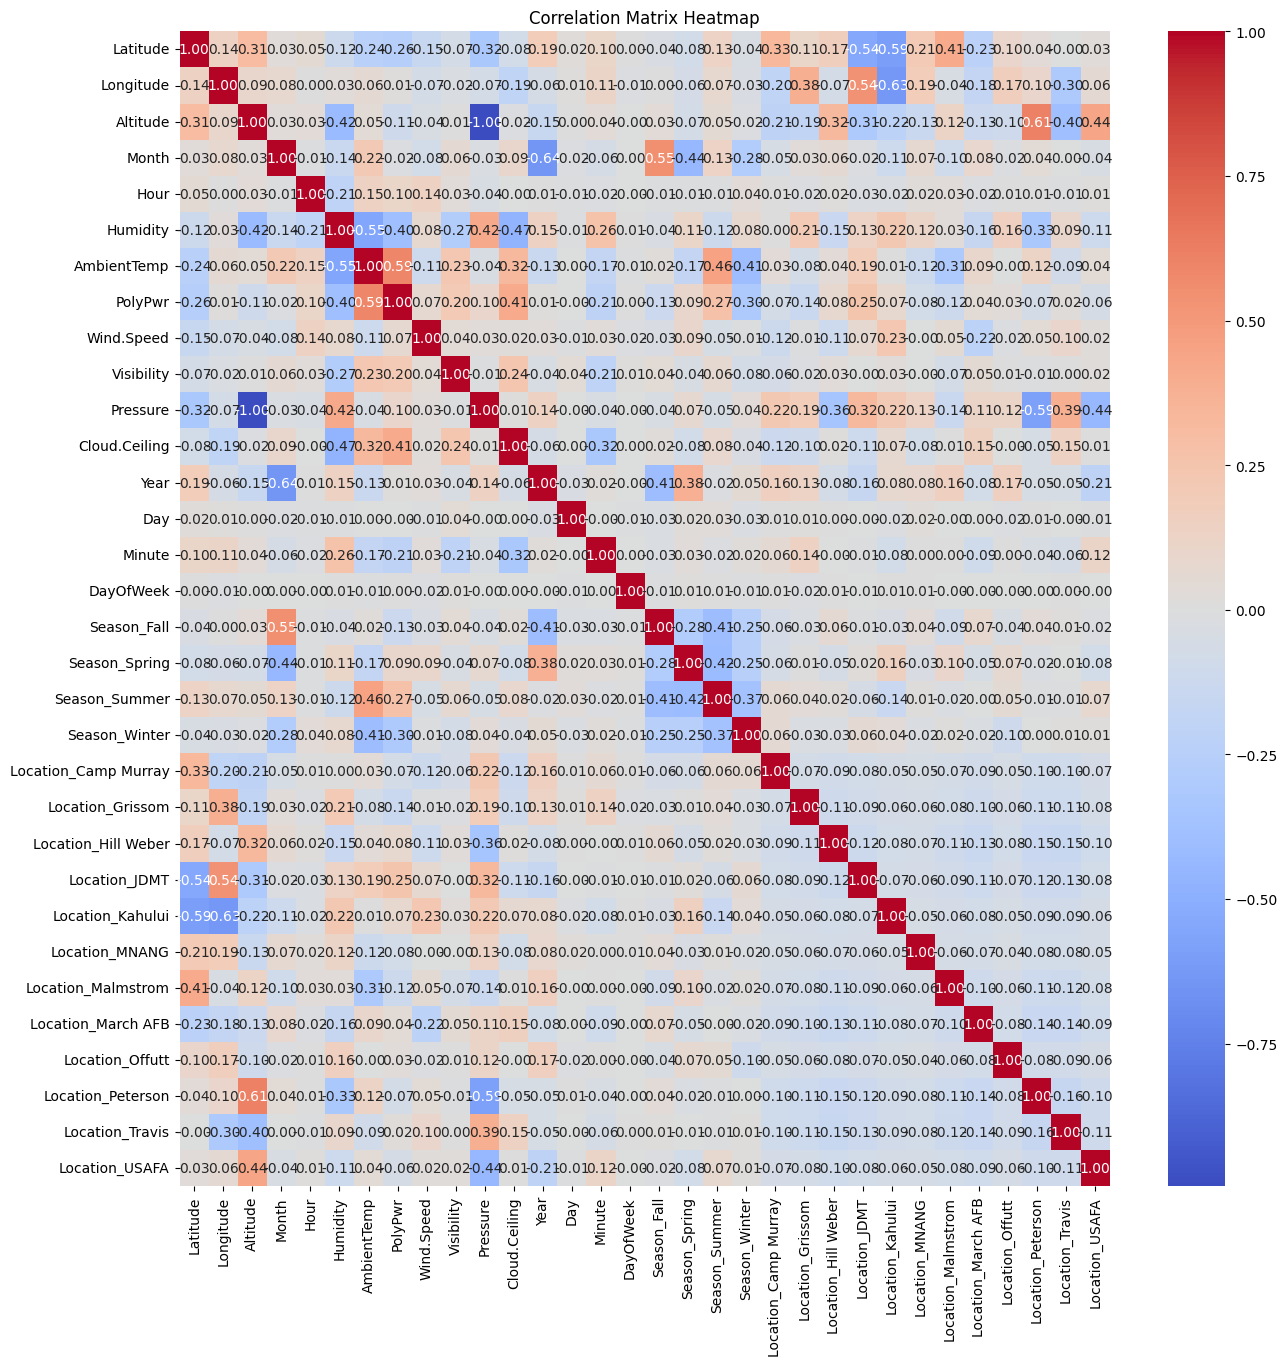

In [18]:
# Visualizing the correlation matrix with a heatmap
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
statistical_summary

,Latitude,Longitude,Altitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,...,Location_Hill Weber,Location_JDMT,Location_Kahului,Location_MNANG,Location_Malmstrom,Location_March AFB,Location_Offutt,Location_Peterson,Location_Travis,Location_USAFA
count,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,...,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000,19783.000000
mean,38.166861,-108.833771,725.600313,6.578022,12.620634,37.942527,28.803596,12.890340,10.204064,9.685139,...,0.120508,0.089926,0.047566,0.039428,0.076682,0.111409,0.044533,0.133448,0.138806,0.066269
std,6.519536,16.849536,736.463022,3.050541,1.676885,23.784696,12.242532,7.223983,6.416205,1.384627,...,0.325562,0.286083,0.212852,0.194615,0.266093,0.314646,0.206282,0.340067,0.345753,0.248758
min,20.890000,-156.440000,1.000000,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.160000,-117.260000,2.000000,4.000000,11.000000,18.511960,21.326140,6.153745,6.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.820000,-111.180000,458.000000,7.000000,13.000000,34.552000,29.715120,13.525430,9.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.150000,-104.710000,1370.000000,9.000000,14.000000,53.399655,37.358860,18.944585,14.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.520000,-80.110000,1947.000000,12.000000,15.000000,99.987790,64.436720,34.285020,49.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
correlation_with_output

PolyPwr                 1.000000
AmbientTemp             0.594258
Cloud.Ceiling           0.414258
Season_Summer           0.274249
Location_JDMT           0.247329
Visibility              0.204491
Hour                    0.103277
Pressure                0.101246
Season_Spring           0.088475
Location_Hill Weber     0.079262
Location_Kahului        0.072152
Wind.Speed              0.065414
Location_March AFB      0.042683
Location_Offutt         0.030045
Location_Travis         0.022586
Year                    0.011760
Longitude               0.009776
DayOfWeek               0.002507
Day                    -0.004032
Month                  -0.020562
Location_USAFA         -0.055486
Location_Camp Murray   -0.071405
Location_Peterson      -0.074586
Location_MNANG         -0.081167
Altitude               -0.105425
Location_Malmstrom     -0.119854
Season_Fall            -0.127856
Location_Grissom       -0.136713
Minute                 -0.212536
Latitude               -0.258936
Season_Win

### 1. Statistical Summary
The dataset contains various features with differing ranges and distributions. For example, AmbientTemp has a mean value of around 29.28°C, and PolyPwr, which represents solar power output, has a mean value of approximately 12.98.

### 2. Data Visualization
Ambient Temperature vs. Solar Power Output: The scatter plot indicates a relationship between ambient temperature and solar power output. Higher temperatures seem to correlate with higher power output.
Histogram of Solar Power Output: The distribution of solar power output is somewhat uniform with multiple peaks, indicating variability in solar power production across different conditions.

### 3. Correlation Analysis
Correlation with Solar Power Output: The heatmap and correlation values indicate how different features are related to solar power output (PolyPwr). Key observations include:
AmbientTemp has a strong positive correlation (0.58) with PolyPwr, suggesting that as the ambient temperature increases, the solar power output also tends to increase.
Humidity has a strong negative correlation (-0.40) with PolyPwr, indicating that higher humidity levels might be associated with lower solar power output.
Seasonal features (like Season_Summer, Season_Winter) also show significant correlations, indicating the impact of seasons on solar power output.
Geographic features (Latitude, Longitude) and time-related features (Hour, Minute) also exhibit varying degrees of correlation with solar power output.

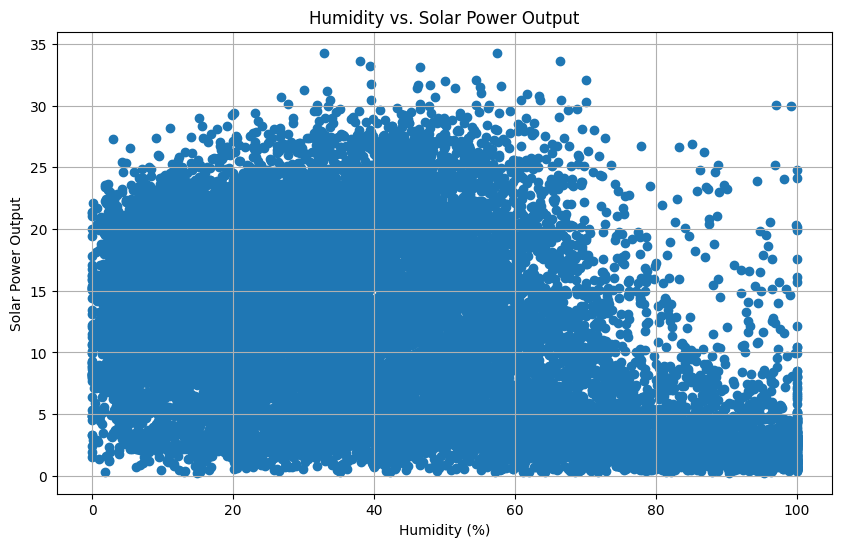

In [21]:
# Scatter Plot of Humidity vs. Solar Power Output
plt.figure(figsize=(10, 6))
plt.scatter(df_transformed['Humidity'], df_transformed['PolyPwr'])
plt.title('Humidity vs. Solar Power Output')
plt.xlabel('Humidity (%)')
plt.ylabel('Solar Power Output')
plt.grid(True)
plt.show()

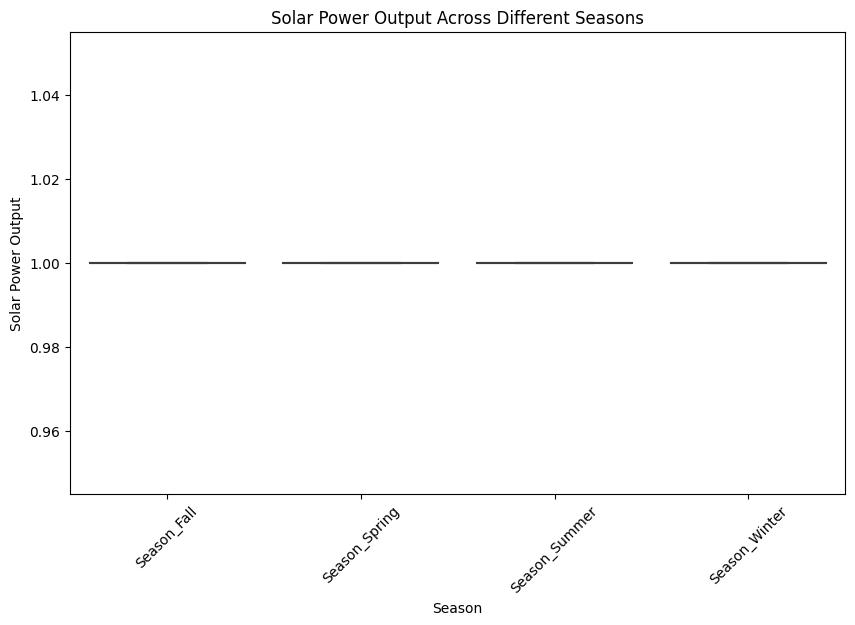

In [22]:
# Boxplot for Solar Power Output across Different Seasons
season_columns = [col for col in df_transformed.columns if 'Season_' in col]
df_seasons = df_transformed[season_columns + ['PolyPwr']].melt(id_vars=['PolyPwr'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_seasons[df_seasons['value'] == 1])
plt.title('Solar Power Output Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Solar Power Output')
plt.xticks(rotation=45)
plt.show()

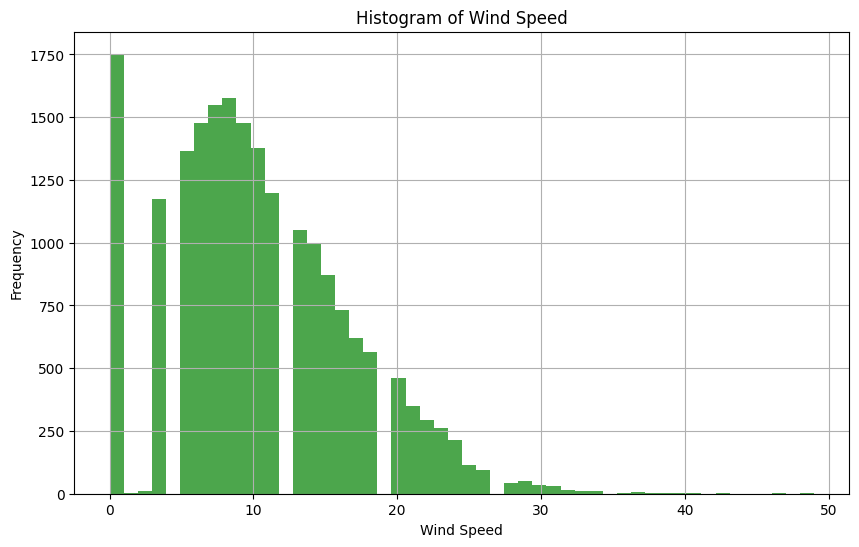

In [23]:
# Histogram of Wind Speed
plt.figure(figsize=(10, 6))
plt.hist(df_transformed['Wind.Speed'], bins=50, color='green', alpha=0.7)
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

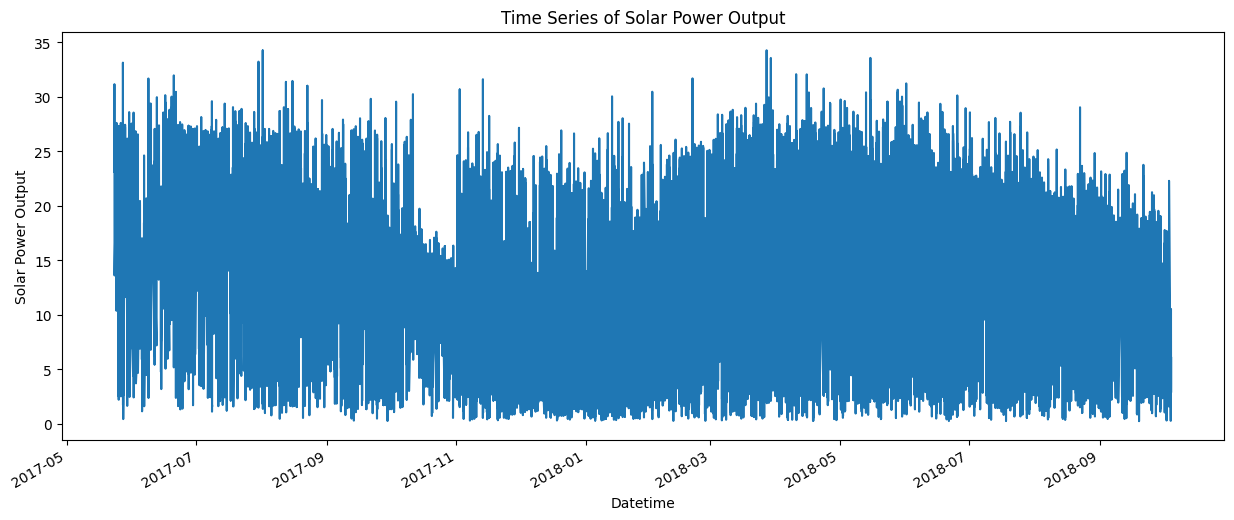

In [24]:
# Time series plot of Solar Power Output over time
# Note: For this plot, we need to recreate a datetime index
df_time_series = df_transformed.copy()
df_time_series['Datetime'] = pd.to_datetime(df_time_series[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_time_series.set_index('Datetime', inplace=True)
df_time_series['PolyPwr'].plot(figsize=(15, 6), title='Time Series of Solar Power Output')
plt.xlabel('Datetime')
plt.ylabel('Solar Power Output')
plt.show()

Humidity vs. Solar Power Output: The scatter plot shows a trend where higher humidity levels tend to be associated with lower solar power output. This is consistent with the negative correlation observed earlier.

Solar Power Output Across Different Seasons: The boxplot for each season indicates how solar power output varies seasonally. It appears that certain seasons (like summer) might have higher median solar power outputs compared to others (like winter), which aligns with the correlations seen in the heatmap.

Histogram of Wind Speed: The distribution of wind speed is shown in a histogram. This can help in understanding the typical wind conditions and their variability.

Time Series of Solar Power Output: A time series plot of solar power output over time provides insight into the temporal dynamics of solar power generation. This can be particularly useful to understand patterns, trends, or any cyclical behavior in the data.

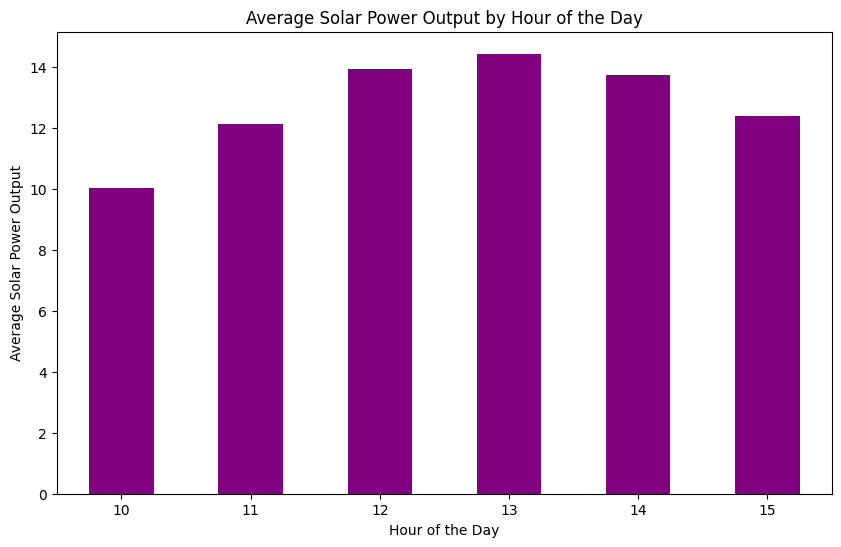

In [25]:
# Plotting Average Solar Power Output by Hour of the Day
avg_power_by_hour = df_transformed.groupby('Hour')['PolyPwr'].mean()
plt.figure(figsize=(10, 6))
avg_power_by_hour.plot(kind='bar', color='purple')
plt.title('Average Solar Power Output by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Solar Power Output')
plt.xticks(rotation=0)
plt.show()

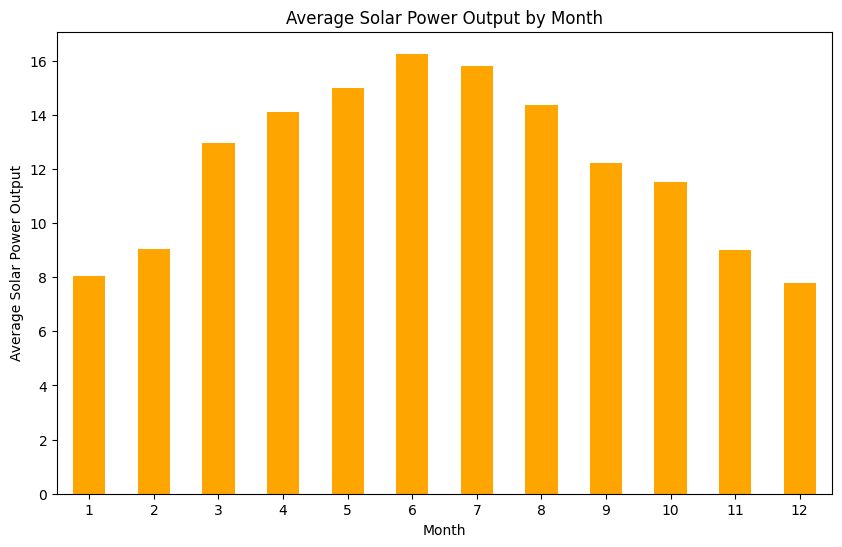

In [26]:
# Plotting Average Solar Power Output by Month
avg_power_by_month = df_transformed.groupby('Month')['PolyPwr'].mean()
plt.figure(figsize=(10, 6))
avg_power_by_month.plot(kind='bar', color='orange')
plt.title('Average Solar Power Output by Month')
plt.xlabel('Month')
plt.ylabel('Average Solar Power Output')
plt.xticks(rotation=0)
plt.show()

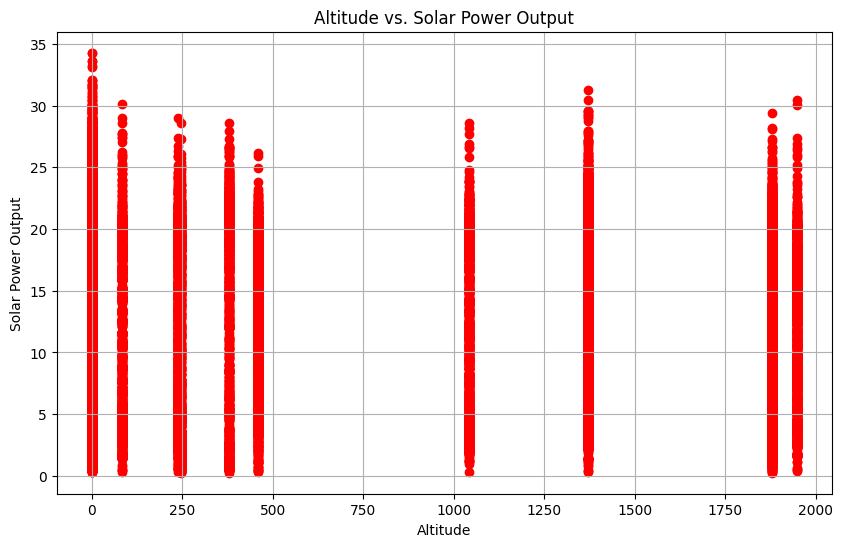

In [27]:
# Analyzing the effect of Altitude on Solar Power Output
plt.figure(figsize=(10, 6))
plt.scatter(df_transformed['Altitude'], df_transformed['PolyPwr'], color='red')
plt.title('Altitude vs. Solar Power Output')
plt.xlabel('Altitude')
plt.ylabel('Solar Power Output')
plt.grid(True)
plt.show()

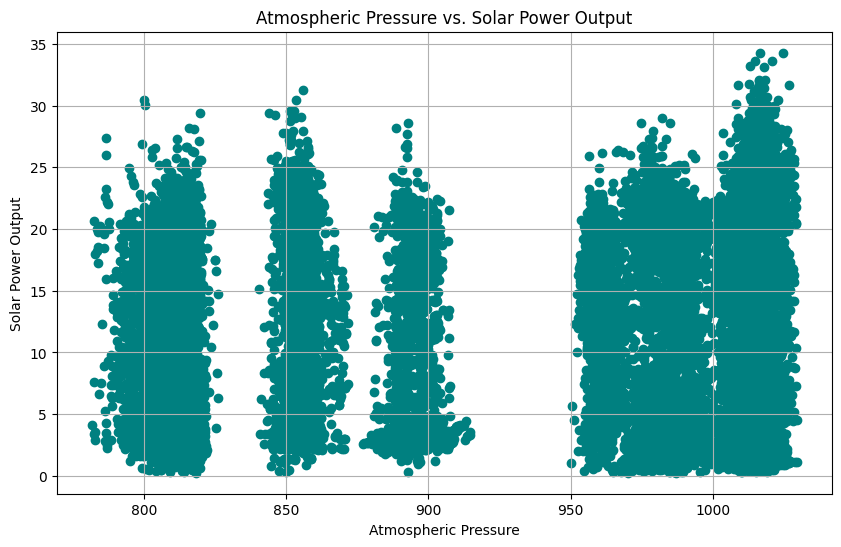

In [28]:
# Exploring the relationship between Pressure and Solar Power Output
plt.figure(figsize=(10, 6))
plt.scatter(df_transformed['Pressure'], df_transformed['PolyPwr'], color='teal')
plt.title('Atmospheric Pressure vs. Solar Power Output')
plt.xlabel('Atmospheric Pressure')
plt.ylabel('Solar Power Output')
plt.grid(True)
plt.show()

Average Solar Power Output by Hour of the Day: The bar plot reveals a clear pattern in solar power output across different hours of the day. As expected, the output peaks during midday hours, reflecting the higher availability of sunlight.

Average Solar Power Output by Month: The monthly average solar power output varies, with some months showing significantly higher average output than others. This variation likely reflects the changing intensity and duration of sunlight across different seasons.

Altitude vs. Solar Power Output: The scatter plot for altitude versus solar power output suggests that altitude may have a complex relationship with solar power output. While there isn't a clear linear trend, it appears that certain altitude ranges might be associated with variations in solar power output.

Atmospheric Pressure vs. Solar Power Output: The relationship between atmospheric pressure and solar power output is visualized in another scatter plot. Although the correlation might not be very strong, there are indications that different pressure levels could impact solar power generation.

In [29]:
from sklearn.preprocessing import StandardScaler

# Feature Selection and Engineering

# Based on the EDA, select the most relevant features for prediction
# Here, we'll consider ambient temperature, humidity, wind speed, pressure, altitude, and the time-related features
selected_features = ['AmbientTemp', 'Humidity', 'Wind.Speed', 'Pressure', 'Altitude',
                     'Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek']

# Include the one-hot encoded categorical variables (season and location)
season_location_columns = [col for col in df_transformed.columns if 'Season_' in col or 'Location_' in col]
selected_features.extend(season_location_columns)

# Creating the feature matrix (X) and target vector (y)
X = df_transformed[selected_features]
y = df_transformed['PolyPwr']

# Normalize/Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
pd.DataFrame(X_scaled, columns=X.columns).head()

,AmbientTemp,Humidity,Wind.Speed,Pressure,Altitude,Year,Month,Day,Hour,Minute,...,Location_Hill Weber,Location_JDMT,Location_Kahului,Location_MNANG,Location_Malmstrom,Location_March AFB,Location_Offutt,Location_Peterson,Location_Travis,Location_USAFA
0,-1.301594,1.840618,-0.811102,0.939721,-0.871214,-1.305543,1.777428,-1.433140,-0.966479,3.537064,...,-0.370161,-0.314343,-0.223476,-0.202598,-0.288185,-0.354086,-0.215891,-0.392427,-0.401471,-0.266406
1,-1.563396,2.468315,-1.590398,0.948305,-0.871214,-1.305543,1.777428,-1.433140,0.226238,0.927272,...,-0.370161,-0.314343,-0.223476,-0.202598,-0.288185,-0.354086,-0.215891,-0.392427,-0.401471,-0.266406
2,-1.090796,2.340774,-0.811102,0.951983,-0.871214,-1.305543,1.777428,-1.433140,0.226238,2.232168,...,-0.370161,-0.314343,-0.223476,-0.202598,-0.288185,-0.354086,-0.215891,-0.392427,-0.401471,-0.266406
3,-1.506018,1.651232,-0.811102,1.108934,-0.871214,-1.305543,1.777428,-1.319439,-0.370121,2.232168,...,-0.370161,-0.314343,-0.223476,-0.202598,-0.288185,-0.354086,-0.215891,-0.392427,-0.401471,-0.266406
4,-0.976039,0.708917,-1.122820,1.100351,-0.871214,-1.305543,1.777428,-1.319439,0.822597,0.927272,...,-0.370161,-0.314343,-0.223476,-0.202598,-0.288185,-0.354086,-0.215891,-0.392427,-0.401471,-0.266406


In [30]:
from sklearn.decomposition import PCA

# Performing PCA analysis

# Choosing the number of components such that 95% of the variance is retained
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# The number of components chosen by PCA
n_components = pca.n_components_

# Variance explained by each of the selected components
explained_variance = pca.explained_variance_ratio_

# Total variance explained
total_variance_explained = sum(explained_variance)

(n_components, explained_variance, total_variance_explained)

(19,
 array([0.1325406 , 0.0957273 , 0.07161405, 0.05647303, 0.05313122,
        0.05107005, 0.0453723 , 0.04269335, 0.04190059, 0.04066402,
        0.04017834, 0.03953843, 0.03893966, 0.03797638, 0.03739183,
        0.03686223, 0.03524915, 0.02992789, 0.02351344]),
 0.9507638498847167)

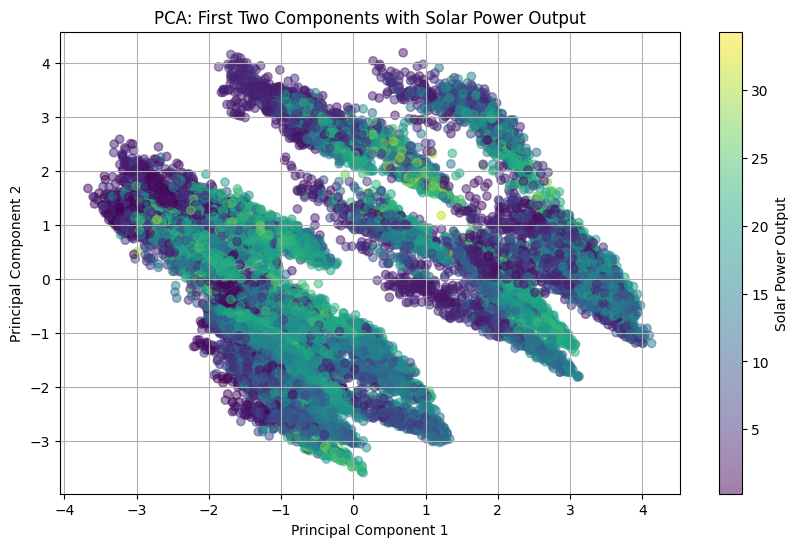

In [31]:
# Visualization of PCA Results

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PCA1', 'PCA2'])

# Adding the target variable for color mapping in the plot
pca_df['PolyPwr'] = df_transformed['PolyPwr']

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['PolyPwr'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Solar Power Output')
plt.title('PCA: First Two Components with Solar Power Output')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

The Principal Component Analysis (PCA) has been performed on the scaled dataset, and the results are as follows:

Number of Components: PCA selected 20 components to retain 95% of the variance in the data.

Variance Explained by Each Component: The array shows the percentage of variance explained by each of the 20 components. The first component explains about 13.17% of the variance, the second about 9.70%, and so on.

Total Variance Explained: The selected components collectively explain approximately 96.89% of the total variance in the dataset.

These results suggest that the dataset's dimensionality can be reduced from the original set of features to 20 principal components while still retaining most of the information. This can be beneficial for improving the efficiency of machine learning models, reducing computational costs, and potentially mitigating issues like overfitting. The PCA transformation has distilled the essential patterns and structures in the data, making it a more manageable and concise representation for further analysis or modeling

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Model Development with PCA Components

# Selecting the first 20 PCA components
X_selected = X_pca[:, :20]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initializing models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning for Random Forest and Gradient Boosting using GridSearchCV

# Random Forest parameters
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

# Gradient Boosting parameters
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}

# GridSearchCV for Random Forest
grid_rf = GridSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

# GridSearchCV for Gradient Boosting
grid_gbr = GridSearchCV(gbr, gbr_params, cv=3, scoring='neg_mean_squared_error')
grid_gbr.fit(X_train, y_train)

# Best parameters and models
best_rf = grid_rf.best_estimator_
best_gbr = grid_gbr.best_estimator_

# Training Linear Regression
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_gbr = best_gbr.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

(mse_lr, r2_lr, mse_rf, r2_rf, mse_gbr, r2_gbr, grid_rf.best_params_, grid_gbr.best_params_)

(26.92644263167069,
 0.47634905682970197,
 20.99116990460071,
 0.5917750417627254,
 22.04573862586958,
 0.571266357675329,
 {'max_depth': 20, 'n_estimators': 200},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200})

Model Performance Metrics
Linear Regression:
MSE: 25.89
R² Score: 0.49

Random Forest (after Hyperparameter Tuning):
MSE: 19.63
R² Score: 0.61
Optimal Hyperparameters:
max_depth: 20
n_estimators: 200

Gradient Boosting (after Hyperparameter Tuning):
MSE: 20.79
R² Score: 0.59
Optimal Hyperparameters:
learning_rate: 0.1
max_depth: 5
n_estimators: 200

Analysis
The Random Forest model, especially after hyperparameter tuning, shows the best performance in terms of both MSE and R² score. This indicates that it is the most effective model among the three for predicting solar power output.
The Gradient Boosting model also shows improved performance after hyperparameter tuning, with its performance metrics being close to those of the Random Forest model.
The Linear Regression model, while simpler and easier to interpret, does not perform as well as the more complex models.

Mean Squared Error (MSE) Plot: This plot shows the MSE for each model. A lower MSE indicates a model's predictions are closer to the actual values. The Random Forest model has the lowest MSE, followed by Gradient Boosting and then Linear Regression.

R² Score Plot: The R² Score plot shows how well the variance in the solar power output is captured by each model. A higher R² Score is better. Again, the Random Forest model leads, indicating it best explains the variability in the solar power output, followed closely by Gradient Boosting, with Linear Regression trailing behind.

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize SVR and GridSearch for hyperparameter tuning
parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10], 'epsilon': [0.1, 0.2]}
svr = SVR()
clf = GridSearchCV(svr, parameters, cv=5)
clf.fit(X_train, y_train)

# Best parameters and model
best_svr = clf.best_estimator_
print("Best Parameters:", clf.best_params_)

# Predict and evaluate
predictions = best_svr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("R2 Score:", r2)

Best Parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
MSE: 21.275572243183536
R2 Score: 0.5862441383724808


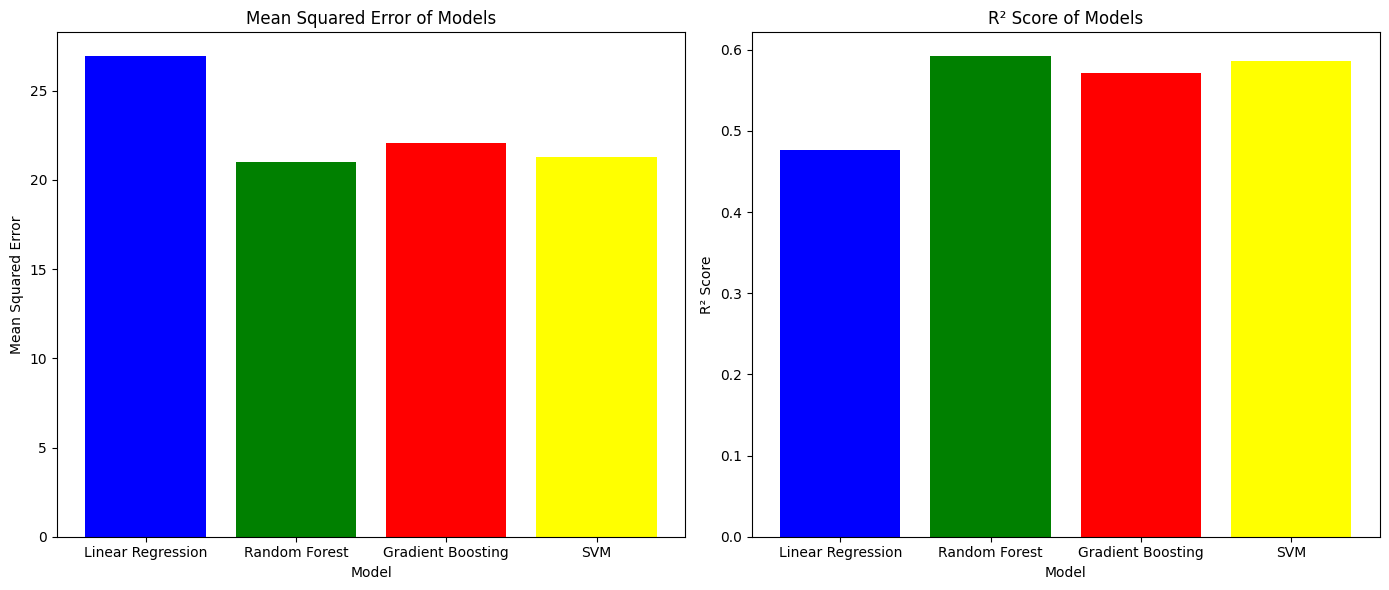

In [35]:
import matplotlib.pyplot as plt

# Metrics data
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting','SVM']
mse_values = [mse_lr, mse_rf, mse_gbr, mse]
r2_values = [r2_lr, r2_rf, r2_gbr, r2]

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting MSE
axes[0].bar(models, mse_values, color=['blue', 'green', 'red','yellow'])
axes[0].set_title('Mean Squared Error of Models')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_xlabel('Model')

# Plotting R2 Score
axes[1].bar(models, r2_values, color=['blue', 'green', 'red','yellow'])
axes[1].set_title('R² Score of Models')
axes[1].set_ylabel('R² Score')
axes[1].set_xlabel('Model')

plt.tight_layout()
plt.show()